##PYSPARK SETUP


In [ ]:
# Step 1: Set Up PySpark in Google Colab
# Install PySpark
!pip install pyspark  # Remove the '#' to uncomment and install PySpark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pandas openpyxl

# Set JAVA_HOME environment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Import Libraries
from pyspark.sql import SparkSession # This should now work after installing PySpark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create Spark session
spark = SparkSession.builder \
    .appName("HotelCustomers") \
    .getOrCreate()

# Step 2: Load the Dataset
from google.colab import files

# Upload the file
uploaded = files.upload()

file_name = "HotelCustomers.xlsx"
# Read the Excel file using pandas
pdf = pd.read_excel(file_name)

Saving HotelCustomers.xlsx to HotelCustomers.xlsx


In [ ]:
# Step 1: Set Up PySpark in Google Colab
# Install PySpark
!pip install pyspark  # Remove the '#' to uncomment and install PySpark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pandas openpyxl

# Set JAVA_HOME environment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Import Libraries
from pyspark.sql import SparkSession # This should now work after installing PySpark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create Spark session
spark = SparkSession.builder \
    .appName("HotelCustomers") \
    .getOrCreate()

# Step 2: Load the Dataset
from google.colab import files

# Upload the file
uploaded = files.upload()

file_name = "HotelCustomers.xlsx"
# Read the Excel file using pandas
pdf = pd.read_excel(file_name)

Saving HotelCustomers.xlsx to HotelCustomers (1).xlsx


In [ ]:
# Step 1: Set Up PySpark in Google Colab
# Install PySpark
!pip install pyspark  # Remove the '#' to uncomment and install PySpark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pandas openpyxl

# Set JAVA_HOME environment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Import Libraries
from pyspark.sql import SparkSession # This should now work after installing PySpark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create Spark session
spark = SparkSession.builder \
    .appName("HotelCustomers") \
    .getOrCreate()

# Step 2: Load the Dataset
from google.colab import files

# Upload the file
uploaded = files.upload()

file_name = "HotelCustomers.xlsx"
# Read the Excel file using pandas
pdf = pd.read_excel(file_name)

Saving HotelCustomers.xlsx to HotelCustomers (2).xlsx


In [ ]:
#Exploratory Data Analysis

##DATA CLEANING


In [ ]:
# Drop unnecessary columns
columns_to_drop = ['NameHash', 'DocIDHash']
pdf.drop(columns=columns_to_drop, inplace=True)

# Remove unrealistic ages (greater than 120) and negative ages
pdf = pdf[(pdf['Age'] >= 0) & (pdf['Age'] <= 100)]

# Remove negative values in 'DaysSinceLastStay' and 'DaysSinceFirstStay'
pdf = pdf[(pdf['DaysSinceLastStay'] >= 0) & (pdf['DaysSinceFirstStay'] >= 0)]

# Remove columns that contain only zeros
columns_with_only_zeros = [col for col in pdf.columns if pdf[col].nunique() == 1 and pdf[col].unique()[0] == 0]
pdf.drop(columns=columns_with_only_zeros, inplace=True)
# Convert the cleaned pandas DataFrame to a Spark DataFrame
df = spark.createDataFrame(pdf)

# Handling missing values: drop rows with any null values
df_cleaned = df.na.drop()

# Show the cleaned DataFrame
df_cleaned.show(10)

# Convert Spark DataFrame to Pandas DataFrame for visualization
pdf_cleaned = df_cleaned.toPandas()

# Create the TotalRevenue column in the pandas DataFrame
pdf_cleaned['TotalRevenue'] = pdf_cleaned['LodgingRevenue'] + pdf_cleaned['OtherRevenue']

# Verify the column is created
print(pdf_cleaned.head())

+---+-----------+----+-----------------+---------------+--------------+------------+----------------+----------------+-----------------+-------------+----------+-----------------+------------------+--------------------+--------------------+-----------+----------+----------------+-------------+---------+--------+------+-------------+---------+--------------+------------------+--------------------+-----------+
| ID|Nationality| Age|DaysSinceCreation|AverageLeadTime|LodgingRevenue|OtherRevenue|BookingsCanceled|BookingsNoShowed|BookingsCheckedIn|PersonsNights|RoomNights|DaysSinceLastStay|DaysSinceFirstStay| DistributionChannel|       MarketSegment|SRHighFloor|SRLowFloor|SRAccessibleRoom|SRMediumFloor|SRBathtub|SRShower|SRCrib|SRKingSizeBed|SRTwinBed|SRNearElevator|SRAwayFromElevator|SRNoAlcoholInMiniBar|SRQuietRoom|
+---+-----------+----+-----------------+---------------+--------------+------------+----------------+----------------+-----------------+-------------+----------+---------------

##SUMMARY STATISTICS

In [ ]:
#  removenegative value from AverageLeadTime

pdf_cleaned = pdf_cleaned[pdf_cleaned['AverageLeadTime'] >= 0]



In [ ]:
# prompt: show all the columns when printing summary table

print(pdf_cleaned.describe(include='all'))


                  ID Nationality           Age  DaysSinceCreation  \
count   60711.000000       60711  60711.000000       60711.000000   
unique           NaN         176           NaN                NaN   
top              NaN         FRA           NaN                NaN   
freq             NaN        9381           NaN                NaN   
mean    36614.119138         NaN     47.284644         518.190410   
std     22857.072609         NaN     14.937855         301.099508   
min         1.000000         NaN      0.000000           0.000000   
25%     17765.500000         NaN     36.000000         248.000000   
50%     33526.000000         NaN     47.000000         519.000000   
75%     53970.500000         NaN     58.000000         787.000000   
max     83589.000000         NaN     96.000000        1095.000000   

        AverageLeadTime  LodgingRevenue  OtherRevenue  BookingsCanceled  \
count      60711.000000    60711.000000  60711.000000      60711.000000   
unique              N

##DATA VISUALIZATIONS

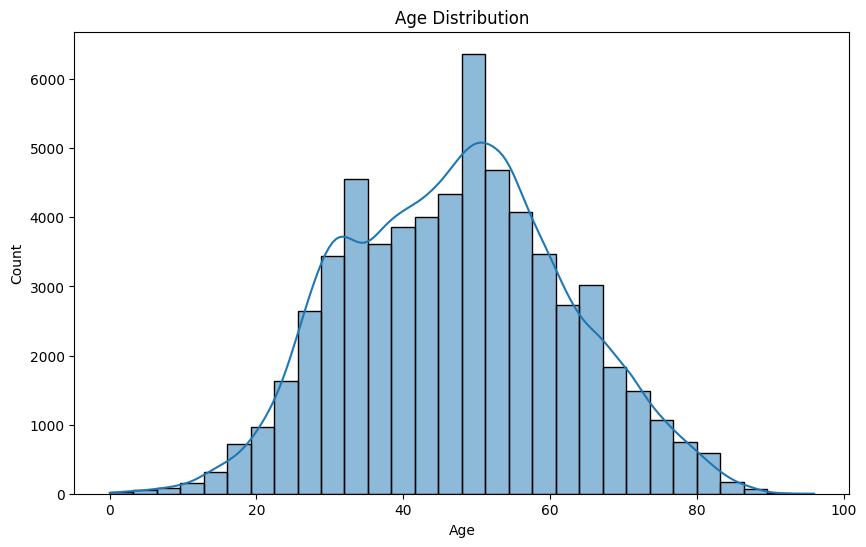

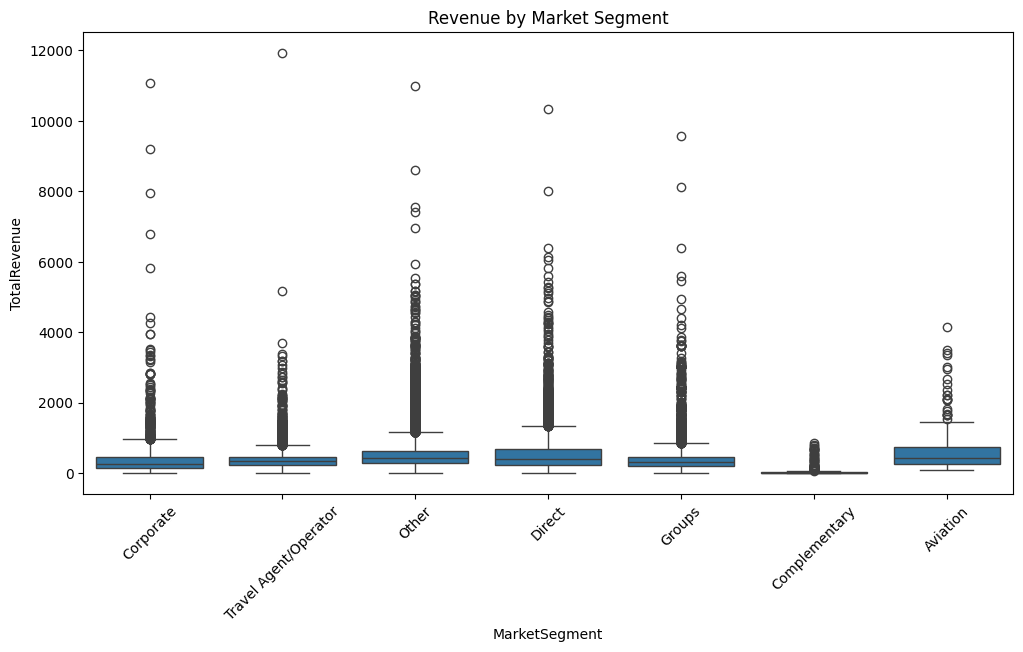

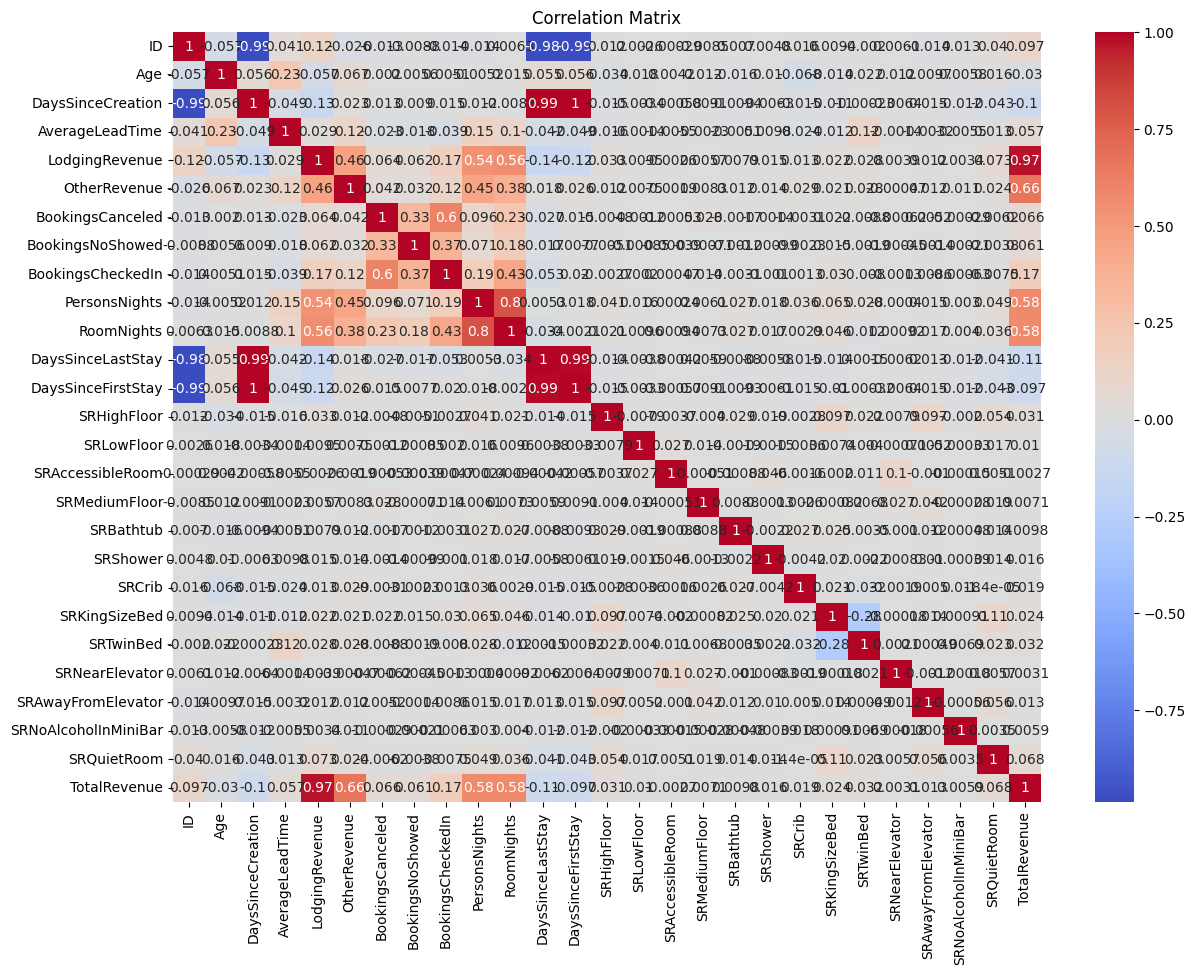

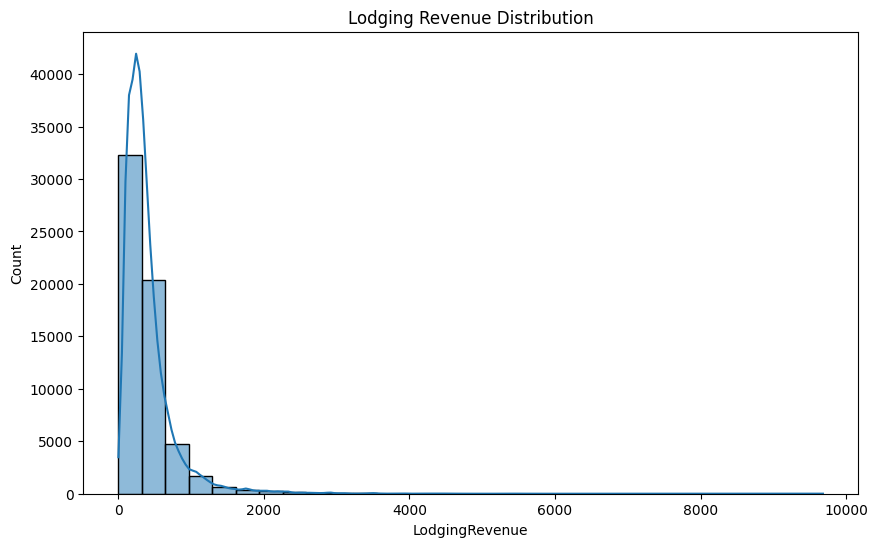

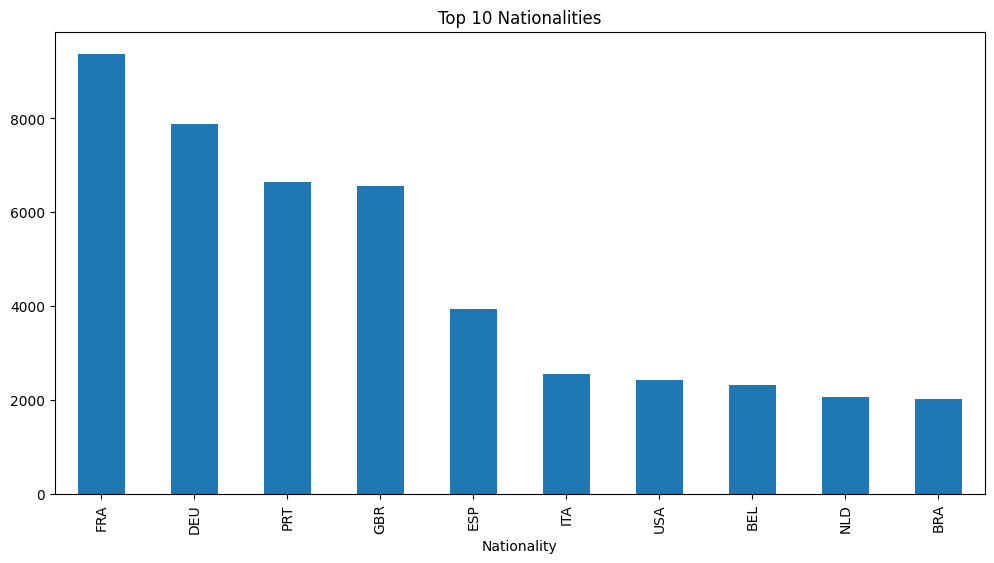

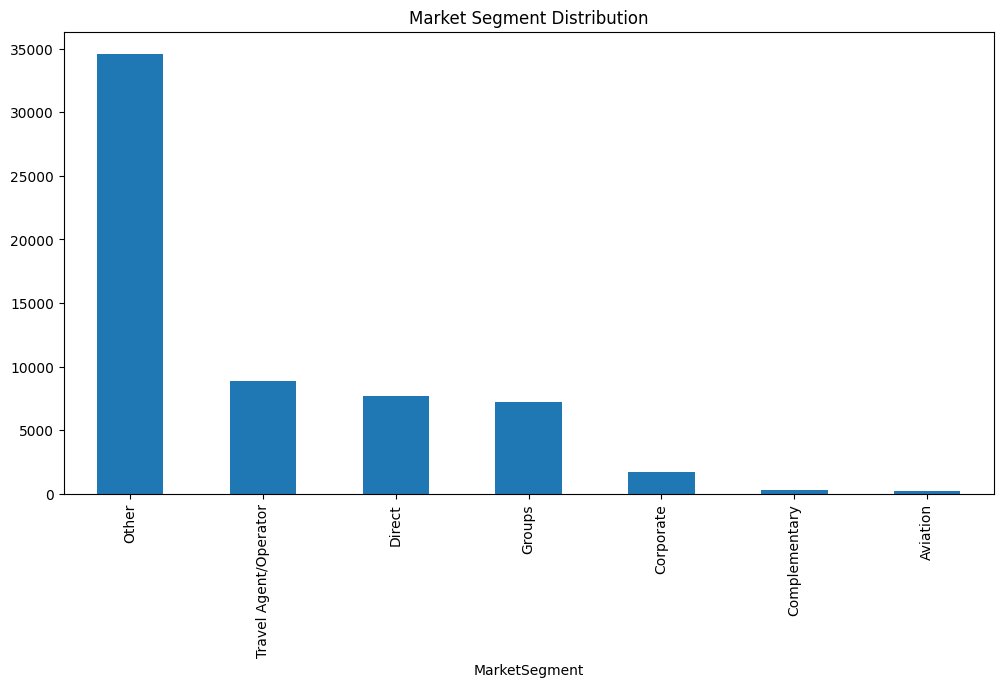

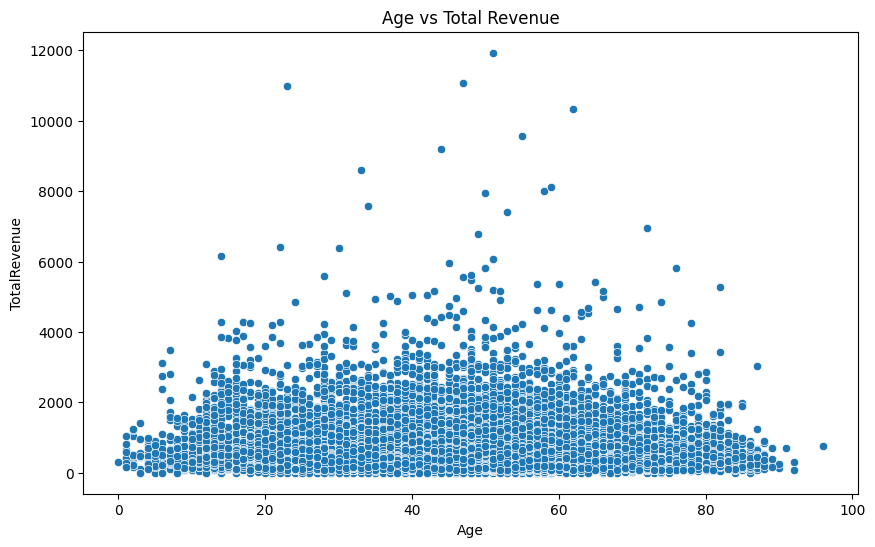

In [ ]:
##Visualizations

# Visualize the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(pdf_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


# Boxplot of Revenue by Market Segment
plt.figure(figsize=(12, 6))
sns.boxplot(x='MarketSegment', y='TotalRevenue', data=pdf_cleaned)
plt.title('Revenue by Market Segment')
plt.xticks(rotation=45)
plt.show()

# Select only numeric columns for correlation matrix
numeric_pdf = pdf_cleaned.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr = numeric_pdf.corr()

# Display the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of 'LodgingRevenue'
plt.figure(figsize=(10, 6))
sns.histplot(pdf_cleaned['LodgingRevenue'], bins=30, kde=True)
plt.title('Lodging Revenue Distribution')
plt.show()

##Categorical Features
# Distribution of 'Nationality'
plt.figure(figsize=(12, 6))
pdf_cleaned['Nationality'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Nationalities')
plt.show()

# Distribution of 'MarketSegment'
plt.figure(figsize=(12, 6))
pdf_cleaned['MarketSegment'].value_counts().plot(kind='bar')
plt.title('Market Segment Distribution')
plt.show()

##Relationship between Features
# Scatter plot between 'Age' and 'TotalRevenue'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalRevenue', data=pdf_cleaned)
plt.title('Age vs Total Revenue')
plt.show()

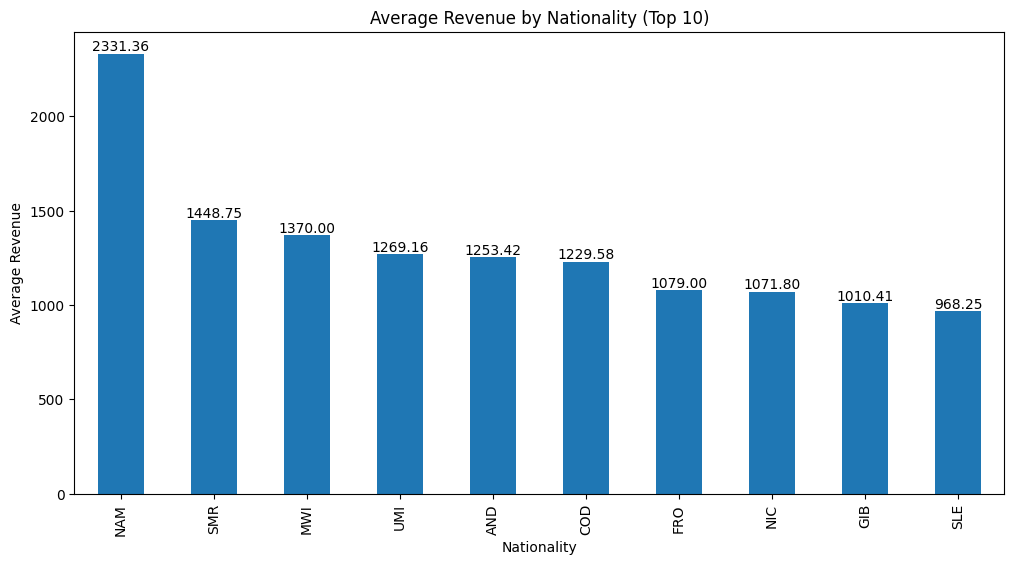

In [ ]:
# Group by data for nationality , find aeverage revenue for each nationality and add vale lables on top of each bar , reduce to only top 10 columns

import matplotlib.pyplot as plt
import pandas as pd

# Group by nationality and calculate average revenue
grouped_df = pdf_cleaned.groupby('Nationality')['TotalRevenue'].mean().sort_values(ascending=False)[:10]

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = grouped_df.plot.bar()

# Add value labels on top of each bar
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

# Show the plot
plt.title('Average Revenue by Nationality (Top 10)')
plt.xlabel('Nationality')
plt.ylabel('Average Revenue')
plt.show()


Mean of PersonsNights: 6.174811813345193
Mean of RoomNights: 3.122926652501194


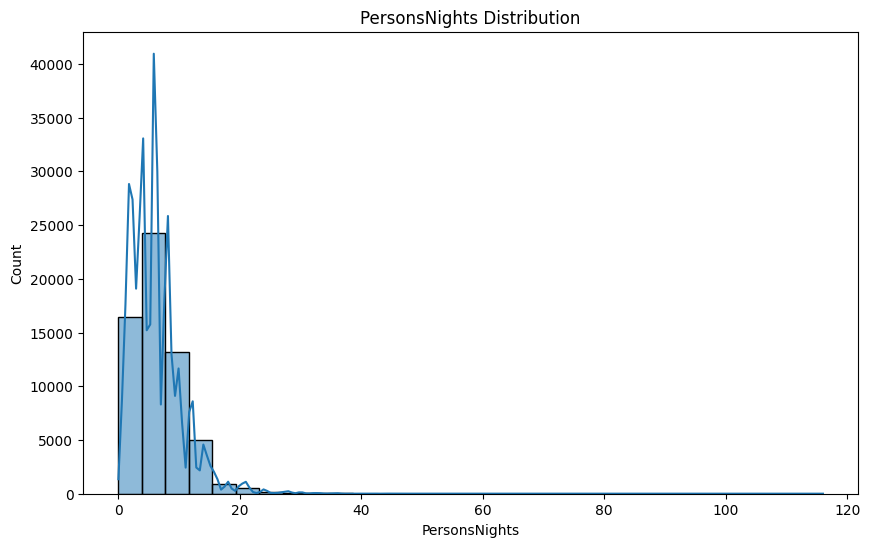

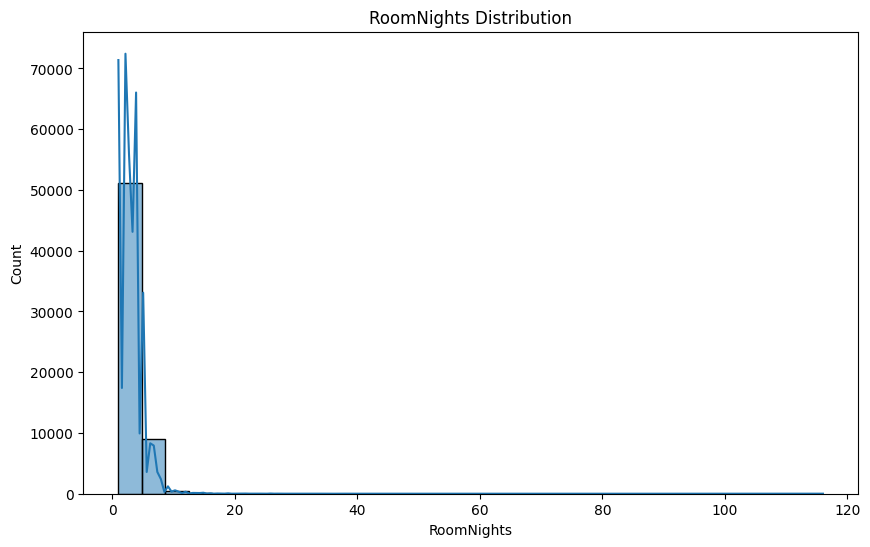

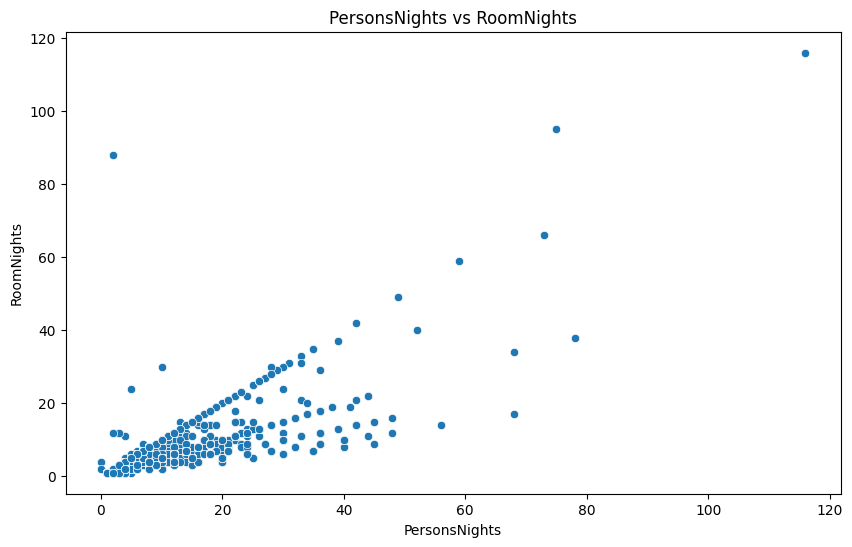

In [ ]:
#analyse PersonsNights and RoomNights columns indepidently

import matplotlib.pyplot as plt
# Analyze PersonsNights column
pdf_cleaned['PersonsNights'].describe()

# Analyze RoomNights column
pdf_cleaned['RoomNights'].describe()

# Compare the mean of PersonsNights and RoomNights
print("Mean of PersonsNights:", pdf_cleaned['PersonsNights'].mean())
print("Mean of RoomNights:", pdf_cleaned['RoomNights'].mean())

# Visualize the distribution of PersonsNights
plt.figure(figsize=(10, 6))
sns.histplot(pdf_cleaned['PersonsNights'], bins=30, kde=True)
plt.title('PersonsNights Distribution')
plt.show()

# Visualize the distribution of RoomNights
plt.figure(figsize=(10, 6))
sns.histplot(pdf_cleaned['RoomNights'], bins=30, kde=True)
plt.title('RoomNights Distribution')
plt.show()

# Analyze the relationship between PersonsNights and RoomNights
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PersonsNights', y='RoomNights', data=pdf_cleaned)
plt.title('PersonsNights vs RoomNights')
plt.show()



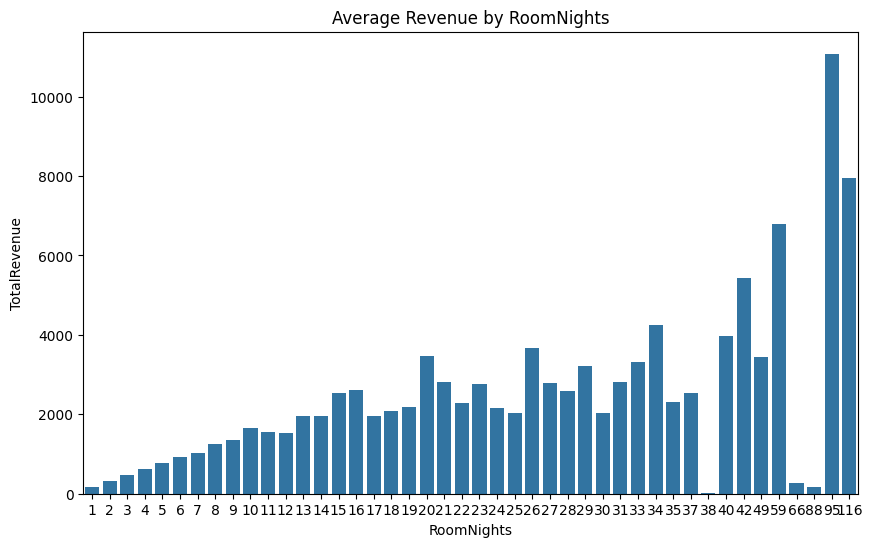

In [ ]:
# prompt: find a average revenue for each unique
# roomnight of stay and plot it

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average revenue for each unique RoomNights
average_revenue_by_roomnights = (
    pdf_cleaned.groupby('RoomNights')['TotalRevenue'].mean().reset_index()
)

# Plot the average revenue by RoomNights
plt.figure(figsize=(10, 6))
sns.barplot(x='RoomNights', y='TotalRevenue', data=average_revenue_by_roomnights)
plt.title('Average Revenue by RoomNights')
plt.show()


In [ ]:
# few key metrics to include in initial slides as dataset overview.

unique_customers = pdf_cleaned['ID'].nunique()
print("Total unique customers:", unique_customers)

print("\n\n")

# calculate average revenue per customer
average_revenue_per_customer = pdf_cleaned['TotalRevenue'].sum() / unique_customers
print("Average revenue per customer:", round(average_revenue_per_customer),2)

# count of unique nationality

print("\n\n")

# avergae total revenue by distribuationChannel

unique_nationalities = pdf_cleaned['Nationality'].nunique()
print("Total unique nationalities:", unique_nationalities)

print("\n\n")

average_total_revenue_by_distribution_channel = (
    pdf_cleaned.groupby('DistributionChannel')['TotalRevenue'].mean().reset_index()
)

# Print the average total revenue by distribution channel
print(average_total_revenue_by_distribution_channel.to_string())

print("\n\n")

# avergae total revenue by MarketSegment

average_total_revenue_by_market_segment = (
    pdf_cleaned.groupby('MarketSegment')['TotalRevenue'].mean().reset_index()
)

# Print the average total revenue by market segment
print(average_total_revenue_by_market_segment.to_string())

# avergae night stay at hotel.
average_nights_stay = (pdf_cleaned['PersonsNights'].sum() + pdf_cleaned['RoomNights'].sum()) / pdf_cleaned.shape[0]
print(f"Average number of nights stayed: {round(average_nights_stay,0)}")

Total unique customers: 60711



Average revenue per customer: 486 2



Total unique nationalities: 176



       DistributionChannel  TotalRevenue
0                Corporate    437.056219
1                   Direct    527.582590
2  Electronic Distribution    335.644503
3    Travel Agent/Operator    483.327344



           MarketSegment  TotalRevenue
0               Aviation    653.920091
1          Complementary     59.987656
2              Corporate    422.759827
3                 Direct    548.162147
4                 Groups    427.280468
5                  Other    517.464598
6  Travel Agent/Operator    383.916774
Average number of nights stayed: 9.0


In [ ]:
# # Insights from above graph

# - hotels major reveues is between 300-500 Euro
# - hotel experiences customers of all age
# - hotels have most customers from france and germany
# - North Vietnam, San Mario and Malawi
# - The majority customers stay for 3-6 days in hotel,and mostly visit in group
# - add key matrics in start of the presentation.

# **Clustring**


In [ ]:
# encoding data.
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
# Define columns to encode
categorical_cols = ['Nationality']

# Create a StringIndexer for each categorical column
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in categorical_cols]

# Fit and transform the DataFrame
pipeline = Pipeline(stages=indexers)
df_encoded = pipeline.fit(df_cleaned).transform(df_cleaned)

# Print the encoded DataFrame
df_encoded.show(10)



+---+-----------+----+-----------------+---------------+--------------+------------+----------------+----------------+-----------------+-------------+----------+-----------------+------------------+--------------------+--------------------+-----------+----------+----------------+-------------+---------+--------+------+-------------+---------+--------------+------------------+--------------------+-----------+-----------------+
| ID|Nationality| Age|DaysSinceCreation|AverageLeadTime|LodgingRevenue|OtherRevenue|BookingsCanceled|BookingsNoShowed|BookingsCheckedIn|PersonsNights|RoomNights|DaysSinceLastStay|DaysSinceFirstStay| DistributionChannel|       MarketSegment|SRHighFloor|SRLowFloor|SRAccessibleRoom|SRMediumFloor|SRBathtub|SRShower|SRCrib|SRKingSizeBed|SRTwinBed|SRNearElevator|SRAwayFromElevator|SRNoAlcoholInMiniBar|SRQuietRoom|Nationality_index|
+---+-----------+----+-----------------+---------------+--------------+------------+----------------+----------------+-----------------+----

In [ ]:
# print encoded colmns for futuere references.

encoded_cols = ['Nationality','Nationality_index']
df_encoded.select(encoded_cols).show(100)


pdf_encoded = pdf_encoded.drop('Nationality')

+-----------+-----------------+
|Nationality|Nationality_index|
+-----------+-----------------+
|        PRT|              2.0|
|        FRA|              0.0|
|        JPN|             25.0|
|        FRA|              0.0|
|        IRL|             11.0|
|        FRA|              0.0|
|        ESP|              4.0|
|        FRA|              0.0|
|        FRA|              0.0|
|        FRA|              0.0|
|        BEL|              7.0|
|        FRA|              0.0|
|        AUT|             12.0|
|        FRA|              0.0|
|        AUT|             12.0|
|        AUT|             12.0|
|        PRT|              2.0|
|        PRT|              2.0|
|        PRT|              2.0|
|        DEU|              1.0|
|        ITA|              5.0|
|        FRA|              0.0|
|        ITA|              5.0|
|        CHN|             16.0|
|        RUS|             22.0|
|        POL|             18.0|
|        ITA|              5.0|
|        ITA|              5.0|
|       

NameError: name 'pdf_encoded' is not defined

In [ ]:
#one hot encoding .
# print unique values in MarketSegment and DistributionChannel columns

unique_market_segments = df_encoded.select('MarketSegment').distinct().collect()
unique_distribution_channels = df_encoded.select('DistributionChannel').distinct().collect()

print("Unique Market Segments:")
for row in unique_market_segments:
    print(row['MarketSegment'])

print("\nUnique Distribution Channels:")
for row in unique_distribution_channels:
    print(row['DistributionChannel'])


Unique Market Segments:
Travel Agent/Operator
Complementary
Aviation
Other
Direct
Corporate
Groups

Unique Distribution Channels:
Travel Agent/Operator
Direct
Electronic Distribution
Corporate


In [ ]:

#encoding Market segment
from pyspark.sql.functions import lit, when
# Create a pivot table with MarketSegment as columns and values as 1s
# Use df_cleaned which still has the MarketSegment column
market_segment_pivot = df_cleaned.groupBy('ID').pivot('MarketSegment').agg(lit(1).alias('value'))

# Fill NaN values with 0 and cast to integer type
for col in market_segment_pivot.columns[1:]: # Iterate over pivoted columns
    market_segment_pivot = market_segment_pivot.withColumn(col, when(market_segment_pivot[col].isNull(), 0).otherwise(market_segment_pivot[col]).cast('integer'))

renamed_cols = [f'MarketSegment_{col}' if col != 'ID' else col for col in market_segment_pivot.columns]
market_segment_pivot = market_segment_pivot.toDF(*renamed_cols)


# Drop the original MarketSegment column from the original DataFrame
df_encoded = df_encoded.drop('MarketSegment')

# Join the encoded DataFrame with the market segment DataFrame using a shared key column, likely 'ID'
df_encoded = df_encoded.join(market_segment_pivot, on='ID', how='left') # Assuming 'ID' is a common column

# Show the first 10 rows of the new DataFrame
df_encoded.show(10)


+---+-----------+----+-----------------+---------------+--------------+------------+----------------+----------------+-----------------+-------------+----------+-----------------+------------------+--------------------+-----------+----------+----------------+-------------+---------+--------+------+-------------+---------+--------------+------------------+--------------------+-----------+-----------------+----------------------+---------------------------+-----------------------+--------------------+--------------------+-------------------+-----------------------------------+
| ID|Nationality| Age|DaysSinceCreation|AverageLeadTime|LodgingRevenue|OtherRevenue|BookingsCanceled|BookingsNoShowed|BookingsCheckedIn|PersonsNights|RoomNights|DaysSinceLastStay|DaysSinceFirstStay| DistributionChannel|SRHighFloor|SRLowFloor|SRAccessibleRoom|SRMediumFloor|SRBathtub|SRShower|SRCrib|SRKingSizeBed|SRTwinBed|SRNearElevator|SRAwayFromElevator|SRNoAlcoholInMiniBar|SRQuietRoom|Nationality_index|MarketSegm

In [ ]:
from pyspark.sql.functions import lit, when

# Use df_cleaned which still has the MarketSegment column
market_segment_pivot = df_cleaned.groupBy('ID').pivot('DistributionChannel').agg(lit(1).alias('value'))

# Fill NaN values with 0 and cast to integer type
for col in market_segment_pivot.columns[1:]: # Iterate over pivoted columns
    market_segment_pivot = market_segment_pivot.withColumn(col, when(market_segment_pivot[col].isNull(), 0).otherwise(market_segment_pivot[col]).cast('integer'))


renamed_cols = [f'DistributionChannel{col}' if col != 'ID' else col for col in market_segment_pivot.columns]
market_segment_pivot = market_segment_pivot.toDF(*renamed_cols)

# Drop the original MarketSegment column from the original DataFrame
df_encoded = df_encoded.drop('DistributionChannel')


# Join the encoded DataFrame with the market segment DataFrame using a shared key column, likely 'ID'
df_encoded = df_encoded.join(market_segment_pivot, on='ID', how='left') # Assuming 'ID' is a common column

# Show the first 10 rows of the new DataFrame
df_encoded.show(10)

+---+-----------+----+-----------------+---------------+--------------+------------+----------------+----------------+-----------------+-------------+----------+-----------------+------------------+-----------+----------+----------------+-------------+---------+--------+------+-------------+---------+--------------+------------------+--------------------+-----------+-----------------+----------------------+---------------------------+-----------------------+--------------------+--------------------+-------------------+-----------------------------------+----------------------------+-------------------------+------------------------------------------+----------------------------------------+----------------------------+-------------------------+------------------------------------------+----------------------------------------+
| ID|Nationality| Age|DaysSinceCreation|AverageLeadTime|LodgingRevenue|OtherRevenue|BookingsCanceled|BookingsNoShowed|BookingsCheckedIn|PersonsNights|RoomNights|

In [ ]:
#applying k-means clustering algorithm.
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler # Import VectorAssembler

# Define a list of k values to evaluate
k_values = [2,3, 4, 5, 6, 7, 8, 9, 10]

# Initialize an empty list to store the Within Set Sum of Squared Errors (WSSSE) for each k
wsses = []

# Specify the columns you want to use as features for clustering
feature_columns = ['Nationality_index', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
                   'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
                   'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
                   'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
                   'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
                   'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
                   'SRQuietRoom', 'MarketSegment_Aviation', 'MarketSegment_Complementary',
                   'MarketSegment_Corporate', 'MarketSegment_Direct', 'MarketSegment_Groups',
                   'MarketSegment_Other', 'MarketSegment_Travel Agent/Operator',
                   'DistributionChannelCorporate', 'DistributionChannelDirect',
                   'DistributionChannelElectronic Distribution', 'DistributionChannelTravel Agent/Operator']

# Create a VectorAssembler to combine features
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df_encoded)

# Loop through each k value
for k in k_values:
    # Create a KMeans model with the specified k
    kmeans = KMeans(k=k, featuresCol='features') # Use featuresCol

    # Fit the model to the data (use the assembled DataFrame)
    model = kmeans.fit(df_assembled)

    # Obtain the Within Set Sum of Squared Errors (WSSSE) for the current k
    wssc = model.summary.trainingCost  # Access the training cost from the model summary

    # Append the WSSSE to the list
    wsses.append(wssc)

# Create a DataFrame to store the k values and WSSSEs
wssse_df = pd.DataFrame({'k': k_values, 'wssc': wsses})

# Plot the WSSSE for each k
plt.figure(figsize=(10, 6))
# Assuming you have seaborn installed for better plotting
#!pip install seaborn
import seaborn as sns # Import seaborn if not already done
sns.lineplot(data=wssse_df, x='k', y='wssc')
plt.title('Elbow Method for Optimal k Selection')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.show()

AnalysisException: [AMBIGUOUS_REFERENCE] Reference `DistributionChannelCorporate` is ambiguous, could be: [`DistributionChannelCorporate`, `DistributionChannelCorporate`].

In [ ]:
#encoding Distribution Channel
from pyspark.sql.functions import lit, when

# Use df_cleaned which still has the DistributionChannel column
distributionchannel_pivot = df_cleaned.groupBy('ID').pivot('DistributionChannel').agg(lit(1).alias('value'))

# Fill NaN values with 0 and cast to integer type
for col in distributionchannel_pivot.columns[1:]: # Iterate over pivoted columns
    distributionchannel_pivot = distributionchannel_pivot.withColumn(col, when(distributionchannel_pivot[col].isNull(), 0).otherwise(distributionchannel_pivot[col]).cast('integer'))


renamed_cols = [f'DistributionChannel{col}' if col != 'ID' else col for col in distributionchannel_pivot.columns]
distributionchannel_pivot = distributionchannel_pivot.toDF(*renamed_cols)

# Drop the original DistributionChannel column from the original DataFrame
df_encoded = df_encoded.drop('DistributionChannel') # Drop the original column before joining


# Join the encoded DataFrame with the distribution channel DataFrame using a shared key column, likely 'ID'
df_encoded = df_encoded.join(distributionchannel_pivot, on='ID', how='left') # Assuming 'ID' is a common column

# Show the first 10 rows of the new DataFrame
df_encoded.show(10)

+---+-----------+----+-----------------+---------------+--------------+------------+----------------+----------------+-----------------+-------------+----------+-----------------+------------------+-----------+----------+----------------+-------------+---------+--------+------+-------------+---------+--------------+------------------+--------------------+-----------+-----------------+----------------------+---------------------------+-----------------------+--------------------+--------------------+-------------------+-----------------------------------+----------------------------+-------------------------+------------------------------------------+----------------------------------------+----------------------------+-------------------------+------------------------------------------+----------------------------------------+----------------------------+-------------------------+------------------------------------------+----------------------------------------+
| ID|Nationality| Age|

In [ ]:
kmeans = KMeans(k=3)

# Update feature_columns to exclude the dropped columns
feature_columns = ['Nationality_index', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
                   'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
                   'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
                   'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
                   'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
                   'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
                   'SRQuietRoom', 'MarketSegment_Aviation', 'MarketSegment_Complementary',
                   'MarketSegment_Corporate', 'MarketSegment_Direct', 'MarketSegment_Groups',
                   'MarketSegment_Other', 'MarketSegment_Travel Agent/Operator']  # Removed the dropped column names

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df_encoded)

# Fit KMeans model
model = kmeans.fit(df_assembled)

# Make predictions
predictions = model.transform(df_assembled)

# Show the predictions
predictions.show()
# Check for duplicate columns
print(df_encoded.columns)

# If duplicate columns exist, drop them before proceeding
cols_to_drop = ['DistributionChannelCorporate', 'DistributionChannelDirect', 'DistributionChannelElectronic Distribution', 'DistributionChannelTravel Agent/Operator']  # List the duplicate columns
df_encoded = df_encoded.drop(*cols_to_drop)  # Drop the duplicate columns

# Now try running your VectorAssembler and KMeans code again
kmeans = KMeans(k=3)

# ... (rest of your code)

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df_encoded)

# Fit KMeans model
model = kmeans.fit(df_assembled)

# Make predictions
predictions = model.transform(df_assembled)

# Show the predictions
predictions.show()

+----+-----------+----+-----------------+---------------+--------------+------------+----------------+----------------+-----------------+-------------+----------+-----------------+------------------+-----------+----------+----------------+-------------+---------+--------+------+-------------+---------+--------------+------------------+--------------------+-----------+-----------------+----------------------+---------------------------+-----------------------+--------------------+--------------------+-------------------+-----------------------------------+-----------------------------------------------+--------------------------------------------+-------------------------------------------------------------+-----------------------------------------------------------+------------------------------------------------------------------+---------------------------------------------------------------+--------------------------------------------------------------------------------+------------

In [ ]:
# Analysing clusters

# Drop unnecessary features
drop_cols = ['features']
predictions_dropped = predictions.drop(*drop_cols)

# Aggregate data based on predicted clusters and calculate the mean of each column
cluster_means = predictions_dropped.groupby('prediction').mean()

# Print the cluster means
print(cluster_means.show())


+----------+------------------+-----------------+----------------------+--------------------+-------------------+-----------------+---------------------+---------------------+----------------------+------------------+-----------------+----------------------+-----------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-----------------------+-------------------------+-------------------+----------------------+---------------------------+--------------------------------+----------------------------+-------------------------+-------------------------+------------------------+----------------------------------------+----------------------------------------------------+-------------------------------------------------+------------------------------------------------------------------+--------------------------------------

In [ ]:
#filtering important columns.
selected_cols = ['prediction', 'avg(DaysSinceCreation)', 'avg(DaysSinceLastStay)', 'avg(LodgingRevenue)', 'avg(OtherRevenue)', 'avg(RoomNights)', 'avg(SRBathtub)', 'avg(SRCrib)', 'avg(SRAwayFromElevator)', 'avg(SRQuietRoom)', 'avg(MarketSegment_Aviation)', 'avg(MarketSegment_Corporate)']

cluster_means_selected = cluster_means.select(selected_cols)

cluster_means_selected.show()


+----------+----------------------+----------------------+-------------------+-----------------+-----------------+--------------------+--------------------+-----------------------+-------------------+---------------------------+----------------------------+
|prediction|avg(DaysSinceCreation)|avg(DaysSinceLastStay)|avg(LodgingRevenue)|avg(OtherRevenue)|  avg(RoomNights)|      avg(SRBathtub)|         avg(SRCrib)|avg(SRAwayFromElevator)|   avg(SRQuietRoom)|avg(MarketSegment_Aviation)|avg(MarketSegment_Corporate)|
+----------+----------------------+----------------------+-------------------+-----------------+-----------------+--------------------+--------------------+-----------------------+-------------------+---------------------------+----------------------------+
|         1|     780.1682182216442|       780.27585734821| 309.04333390375797|83.43968854815569|2.970566089396947|0.002361557943733...|0.008214114586898488|   0.004757341364912041| 0.0921349852830447|       0.002772263673078..

In [ ]:
# renaming clusters.
from pyspark.sql.functions import expr

# Rename the 'prediction' column to 'Cluster Names'
predictions_renamed = cluster_means.withColumnRenamed('prediction', 'Cluster Names')

# Replace cluster names with given labels, use predictions_renamed instead of cluster_means
predictions_renamed = predictions_renamed.withColumn('Cluster Names', # Use the renamed DataFrame
                                                  expr("CASE WHEN `Cluster Names` = 0 THEN 'Moderate Revenue, moderate customers' "
                                                       "WHEN `Cluster Names` = 1 THEN 'Moderate Revenue, Lapsed Customers' "
                                                       "WHEN `Cluster Names` = 2 THEN 'High Revenue, Recent Customers' "
                                                       "ELSE 'Unknown' END"))

# Show the updated DataFrame
predictions_renamed.show(10)

+--------------------+------------------+-----------------+----------------------+--------------------+-------------------+-----------------+---------------------+---------------------+----------------------+------------------+-----------------+----------------------+-----------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-----------------------+-------------------------+-------------------+----------------------+---------------------------+--------------------------------+----------------------------+-------------------------+-------------------------+------------------------+----------------------------------------+----------------------------------------------------+-------------------------------------------------+------------------------------------------------------------------+----------------------------

<ipython-input-35-6bbc1f37b14b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Names', y=col, data=predictions_pandas, ax=ax,palette=colors)
<ipython-input-35-6bbc1f37b14b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Names', y=col, data=predictions_pandas, ax=ax,palette=colors)
<ipython-input-35-6bbc1f37b14b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Names', y=col, data=predictions_pandas, ax=ax,palette=colors)
<ipython-input-35-6bbc1f37b14b>:30: FutureWarning: 

Passing `palette` without ass

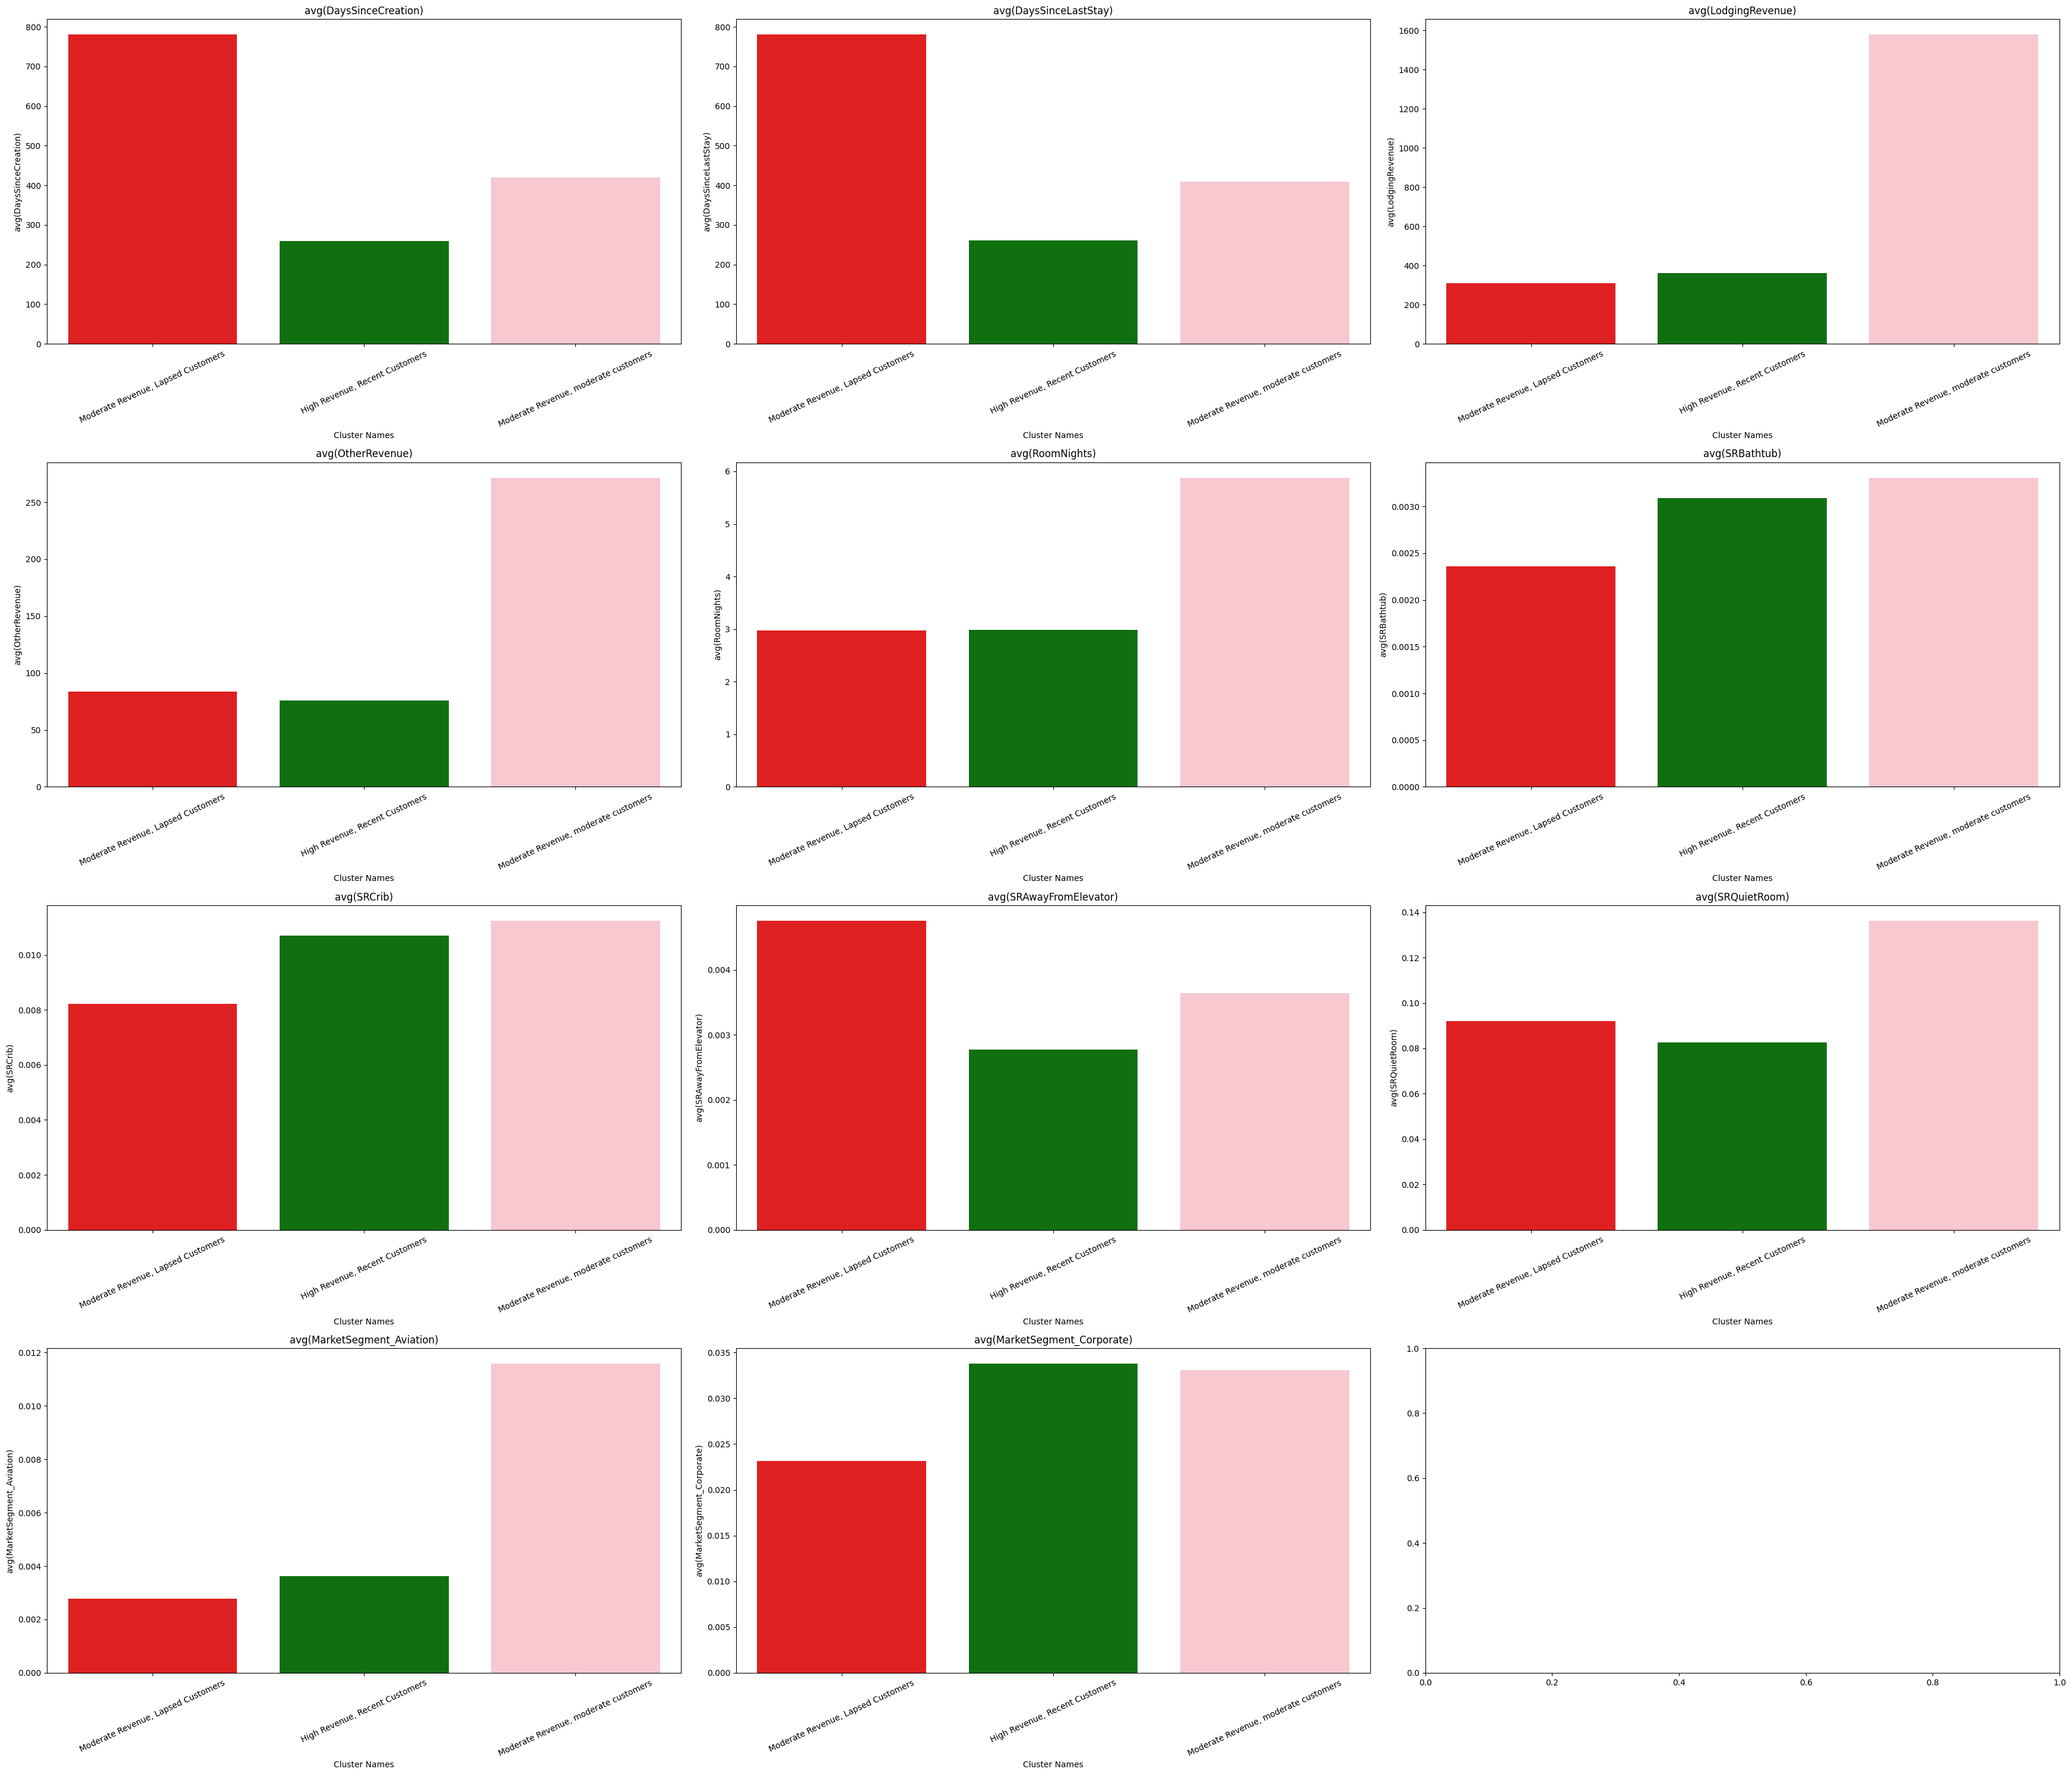

In [ ]:
#plotting results.
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas DataFrame
predictions_pandas = predictions_renamed.toPandas() # Convert to Pandas

# Define the number of columns and rows for the grid
ncols = 3
nrows = 4

colors = ['red','green','pink']

# Create a figure with the desired grid size
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(35, 30))

# Flatten the axes array for easy iteration
axes = axes.flat

# Define the list of columns to plot
columns_to_plot = ['avg(DaysSinceCreation)', 'avg(DaysSinceLastStay)', 'avg(LodgingRevenue)', 'avg(OtherRevenue)', 'avg(RoomNights)', 'avg(SRBathtub)', 'avg(SRCrib)', 'avg(SRAwayFromElevator)', 'avg(SRQuietRoom)', 'avg(MarketSegment_Aviation)', 'avg(MarketSegment_Corporate)']

# Loop through each column and create a bar plot
for i, col in enumerate(columns_to_plot):
    # Select the appropriate subplot
    ax = axes[i]

    # Create a bar plot with 'Cluster Names' on the x-axis and the current column's average on the y-axis
    # Use the Pandas DataFrame here
    sns.barplot(x='Cluster Names', y=col, data=predictions_pandas, ax=ax,palette=colors)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=25)


    # Set the title for the subplot
    ax.set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



# **Final Results**

In [ ]:
# ### Cluster 1: Moderate Revenue, Lapsed Customers

# #### Characteristics:
# - They are the oldest customers of the company.
# - They generate the minimum loading and other revenue for the company.
# - They prefer short stays.
# - They prefer accessible rooms.
# - They are not very sensitive to amenities like showers, bathtubs, or bars; they appear to be more price-sensitive customers.
# - They are recommended by travel agents or belong to the corporate market segment.


In [ ]:
#cluster 0: Moderate Revenue, moderate customers
# spend relatively more on other expenses
# prefer longer stays ,rooms no medium floor, showers , bath tub , quit room
# recommended by travel agents
# similar to older customers



In [ ]:

#- cluster 2 is high revenue customer and Recent customers

# characterstics :
#- They are new hotel customers.
#- They generate the highest loading and other revenue.
#- Having a bathtub and shower is not a big concern for them.
#- They prefer having a crib in the room, a king-size bed, and a room near the elevator.
#- Having alcohol in the minibar is a must.
#- The majority come directly.
#- They belong to the aviation and corporate market segments.





# **Recommendations**

In [ ]:
# # Recommendations For company
# ### Final Strategy for Company:

# 1. Personalized Offers and Loyalty Programs:
#    - Cluster 0: Moderate Customers**: Offer packages that include longer stays, quiet rooms, and provide most value for money rooms at competitive price. Provide loyalty rewards to encourage repeat visits.
#    -Cluster 1: Lapsed Customers : Re-engage with special discounts and promotions on accessible rooms. Highlight improvements and new features to attract their attention.
#    - Cluster 2: High Revenue Customers**: Focus on premium services, ensuring availability of cribs, king-size beds, and well-stocked minibars. Offer exclusive perks for direct bookings and longer stays.

# 2. Targeted Marketing Campaigns:**
#    - **Cluster 0**: Collaborate more with travel agents to recommend suitable packages at competitive prices. Emphasize the comfort and convenience of longer stays.
#    - **Cluster 1**: Use targeted emails to remind them of past stays and offer incentives to return. Highlight affordability and value.
#    - **Cluster 2**: Market through direct channels, emphasizing luxury and exclusivity. Promote special events and offers tailored to the aviation and corporate segments.

